## Analysis of Integrated multi-omics single cell atlas of the human retina
- QC
- EDA
- Clustering
- Clustering Analysis

In [42]:
import sys
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import dill
import matplotlib.pyplot as plt

In [3]:
sys.version

'3.11.7 (main, Jan 17 2024, 16:00:28) [GCC 8.5.0]'

In [4]:
# Notification System
def speak(text):
    from IPython.display import Javascript as js, clear_output
    # Escape single quotes
    text = text.replace("'", r"\'")
    display(js('''
    if(window.speechSynthesis) {{
        var synth = window.speechSynthesis;
        synth.speak(new window.SpeechSynthesisUtterance('{text}'));
    }}
    '''.format(text=text)))
    # Clear the JS so that the notebook doesn't speak again when reopened/refreshed
    clear_output(False)

In [43]:
adata = sc.read_h5ad('camr_scrublet_batch.h5ad')

In [6]:
print(adata)

AnnData object with n_obs × n_vars = 330930 × 32034
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'scrublet', 'title'
    obsm: 'X_scVI', 'X_umap'


In [7]:
display(adata.obs.head())
display(adata.var.head())

,nCount_RNA,nFeature_RNA,percent.mt,pANN,sampleid,subclass_label,majorclass,author_cell_type,age,gender,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,n_genes,doublet_score,predicted_doublet
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,8090.0,3062.0,9.431397,0.191304,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,normal,Mus musculus,male,retina,na,2 weeks,O;1d2cRM*r,3056,0.002020,False
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,8397.0,3145.0,7.264499,0.217391,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,normal,Mus musculus,male,retina,na,2 weeks,<&_ecXlzow,3139,0.001727,False
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1,11927.0,3686.0,8.325648,0.200000,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,normal,Mus musculus,male,retina,na,2 weeks,o(0Cc`LhFQ,3678,0.002219,False
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1,10331.0,3621.0,6.427258,0.173913,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,normal,Mus musculus,male,retina,na,2 weeks,)?i*V-3{5!,3611,0.001824,False
10x3_Ms_WT_P14_AACACACCAGAACTAA-1,11236.0,3739.0,6.034176,0.165217,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,normal,Mus musculus,male,retina,na,2 weeks,<?%Qa*+>_>,3734,0.002119,False


,gene_symbols,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSMUSG00000109644,0610005C13Rik,False,0610005C13Rik,NCBITaxon:10090,gene,3588
ENSMUSG00000108652,0610006L08Rik,False,0610006L08Rik,NCBITaxon:10090,gene,2128
ENSMUSG00000007777,0610009B22Rik,False,0610009B22Rik,NCBITaxon:10090,gene,998
ENSMUSG00000086714,0610009E02Rik,False,0610009E02Rik,NCBITaxon:10090,gene,2977
ENSMUSG00000043644,0610009L18Rik,False,0610009L18Rik,NCBITaxon:10090,gene,1394


## QC

In [8]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var['feature_name'].str.startswith("mt-")

In [9]:
adata.var[adata.var["mt"]]

,gene_symbols,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,mt
ENSMUSG00000064357,mt-Atp6,False,mt-Atp6,NCBITaxon:10090,gene,681,True
ENSMUSG00000064356,mt-Atp8,False,mt-Atp8,NCBITaxon:10090,gene,204,True
ENSMUSG00000064351,mt-Co1,False,mt-Co1,NCBITaxon:10090,gene,1545,True
ENSMUSG00000064354,mt-Co2,False,mt-Co2,NCBITaxon:10090,gene,684,True
ENSMUSG00000064358,mt-Co3,False,mt-Co3,NCBITaxon:10090,gene,784,True
ENSMUSG00000064370,mt-Cytb,False,mt-Cytb,NCBITaxon:10090,gene,1144,True
ENSMUSG00000064341,mt-Nd1,False,mt-Nd1,NCBITaxon:10090,gene,957,True
ENSMUSG00000064345,mt-Nd2,False,mt-Nd2,NCBITaxon:10090,gene,1038,True
ENSMUSG00000064360,mt-Nd3,False,mt-Nd3,NCBITaxon:10090,gene,348,True
ENSMUSG00000064363,mt-Nd4,False,mt-Nd4,NCBITaxon:10090,gene,1378,True


In [10]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], inplace=True, log1p=True
)

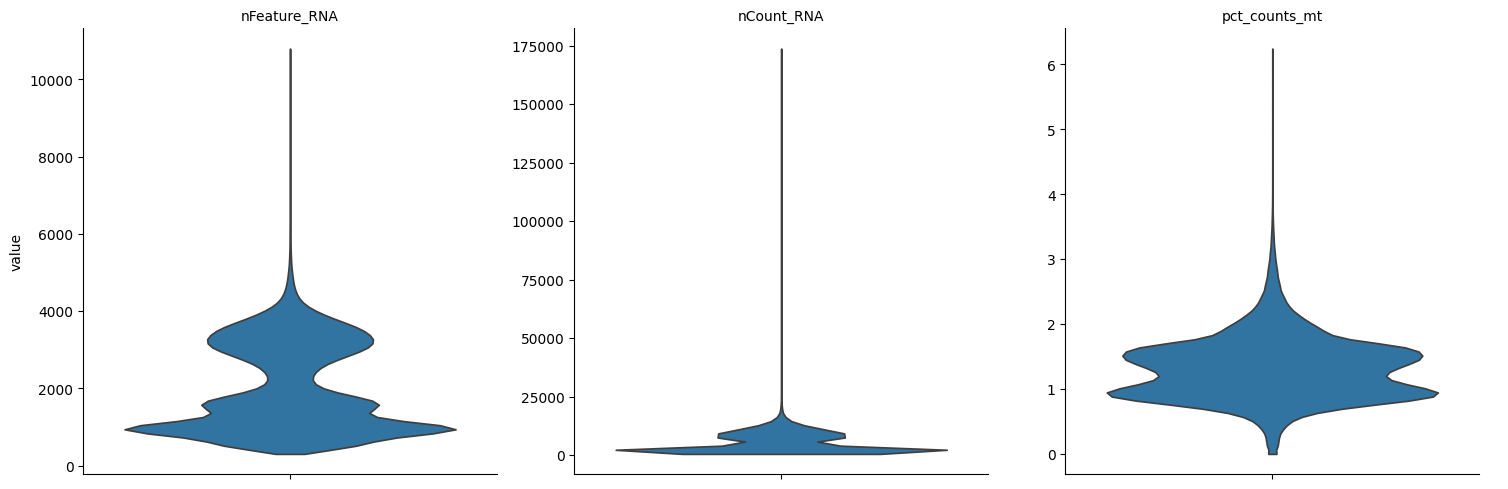

In [11]:
# Better Titles + Legend (More descriptive)
sc.pl.violin(
    adata,
    # ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    ["nFeature_RNA", "nCount_RNA", "pct_counts_mt"],
    stripplot = False,
    multi_panel=True,
    show=False
)

plt.savefig('figures/qc_violin')

AttributeError: 'Legend' object has no attribute 'legendHandles'

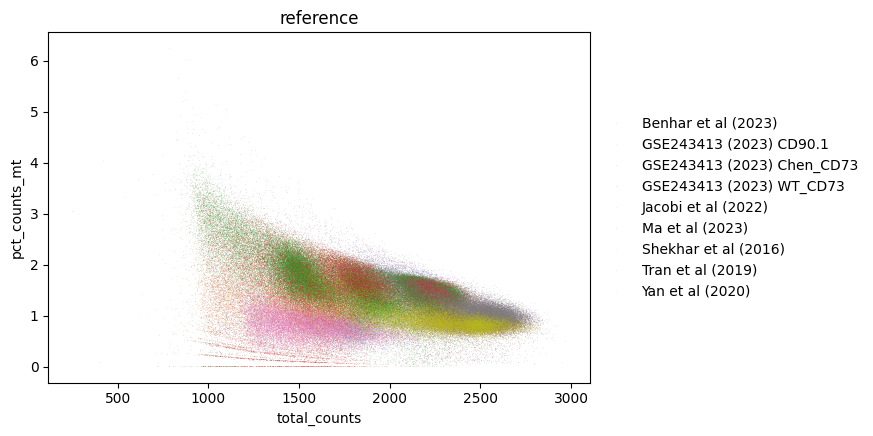

In [12]:
# Color by experiment
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='reference')

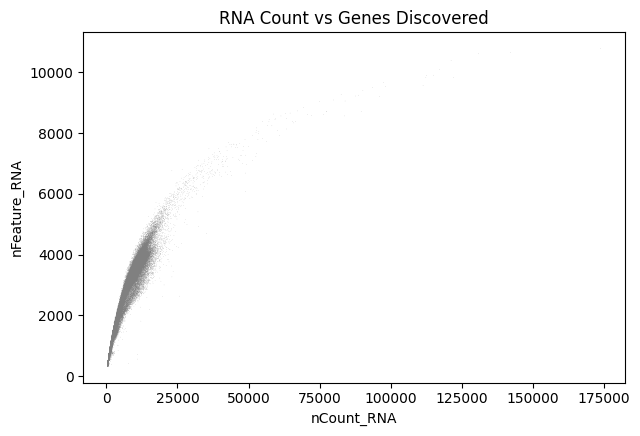

In [45]:
#sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA', color='reference', show=True)
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA', title="RNA Count vs Genes Discovered", show=False)
plt.savefig('figures/counts_vs_genes')

In [13]:
adata.obs[['nFeature_RNA', 'n_genes_by_counts']].head()

,nFeature_RNA,n_genes_by_counts
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,3062.0,3056
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,3145.0,3139
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1,3686.0,3678
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1,3621.0,3611
10x3_Ms_WT_P14_AACACACCAGAACTAA-1,3739.0,3734


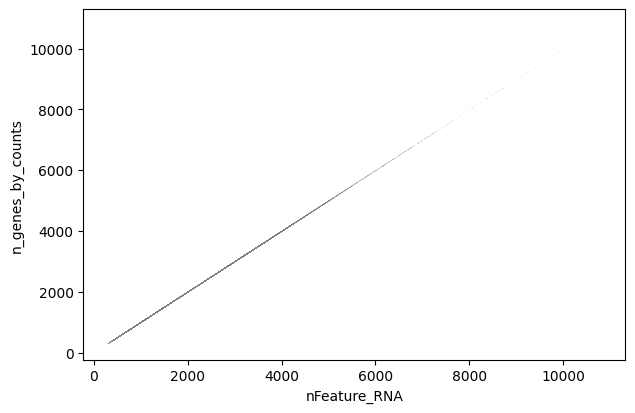

In [14]:
sc.pl.scatter(adata, x='nFeature_RNA', y='n_genes_by_counts', show=True)

In [15]:
adata.obs['total_counts']

10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1     2197.756836
10x3_Ms_WT_P14_AAACCCACATGGATCT-1     2218.916992
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1     2222.557861
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1     2280.132324
10x3_Ms_WT_P14_AACACACCAGAACTAA-1     2314.914062
                                         ...     
CtrlRGCimmuneR2_TTAGGCAGTCGCATCG-1    1857.010376
CtrlRGCimmuneR2_TTCGGTCTCCTGTACC-1    1489.905029
CtrlRGCimmuneR2_TTCGGTCTCGGAGCAA-1    2020.274658
CtrlRGCimmuneR2_TTGCCGTAGGAATGGA-1    1933.153564
CtrlRGCimmuneR2_TTGCCGTCACTGCCAG-1    1969.057373
Name: total_counts, Length: 330930, dtype: float32

Suspicious Distribution. Calculate QC manually and confirm that Violin plots match

In [16]:
pd.options.display.max_columns = None
adata.obs.head()

,nCount_RNA,nFeature_RNA,percent.mt,pANN,sampleid,subclass_label,majorclass,author_cell_type,age,gender,reference,accession,sample_note,development_stage_ontology_term_id,tissue_ontology_term_id,assay_ontology_term_id,disease_ontology_term_id,donor_id,organism_ontology_term_id,self_reported_ethnicity_ontology_term_id,sex_ontology_term_id,suspension_type,tissue_type,library_platform,cell_type_ontology_term_id,is_primary_data,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,8090.0,3062.0,9.431397,0.191304,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,GSE243413 (2023) WT_CD73,GSE243413,NaN,MmusDv:0000046,UBERON:0000966,EFO:0009922,PATO:0000461,pooled_10x3_Ms_WT_P14,NCBITaxon:10090,na,PATO:0000384,cell,tissue,10x-3'-v3,CL:0000751,True,rod bipolar cell,10x 3' v3,normal,Mus musculus,male,retina,na,2 weeks,O;1d2cRM*r,3056,0.002020,False,3056,8.025189,2197.756836,7.695647,6.627282,11.206648,18.703447,35.566470,34.262024,3.562807,1.558954
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,8397.0,3145.0,7.264499,0.217391,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,GSE243413 (2023) WT_CD73,GSE243413,NaN,MmusDv:0000046,UBERON:0000966,EFO:0009922,PATO:0000461,pooled_10x3_Ms_WT_P14,NCBITaxon:10090,na,PATO:0000384,cell,tissue,10x-3'-v3,CL:0000751,True,rod bipolar cell,10x 3' v3,normal,Mus musculus,male,retina,na,2 weeks,<&_ecXlzow,3139,0.001727,False,3139,8.051978,2218.916992,7.705225,6.564354,11.038934,18.514623,35.060276,33.661476,3.545629,1.517023
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1,11927.0,3686.0,8.325648,0.200000,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,GSE243413 (2023) WT_CD73,GSE243413,NaN,MmusDv:0000046,UBERON:0000966,EFO:0009922,PATO:0000461,pooled_10x3_Ms_WT_P14,NCBITaxon:10090,na,PATO:0000384,cell,tissue,10x-3'-v3,CL:0000751,True,rod bipolar cell,10x 3' v3,normal,Mus musculus,male,retina,na,2 weeks,o(0Cc`LhFQ,3678,0.002219,False,3678,8.210396,2222.557861,7.706864,6.735849,11.331282,18.874265,35.074913,35.927227,3.608949,1.616481
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1,10331.0,3621.0,6.427258,0.173913,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,GSE243413 (2023) WT_CD73,GSE243413,NaN,MmusDv:0000046,UBERON:0000966,EFO:0009922,PATO:0000461,pooled_10x3_Ms_WT_P14,NCBITaxon:10090,na,PATO:0000384,cell,tissue,10x-3'-v3,CL:0000751,True,rod bipolar cell,10x 3' v3,normal,Mus musculus,male,retina,na,2 weeks,)?i*V-3{5!,3611,0.001824,False,3611,8.192017,2280.132324,7.732427,6.358029,10.783757,17.909796,33.453434,31.818954,3.491006,1.395487
10x3_Ms_WT_P14_AACACACCAGAACTAA-1,11236.0,3739.0,6.034176,0.165217,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,GSE243413 (2023) WT_CD73,GSE243413,NaN,MmusDv:0000046,UBERON:0000966,EFO:0009922,PATO:0000461,pooled_10x3_Ms_WT_P14,NCBITaxon:10090,na,PATO:0000384,cell,tissue,10x-3'-v3,CL:0000751,True,rod bipolar cell,10x 3' v3,normal,Mus musculus,male,retina,na,2 weeks,<?%Qa*+>_>,3734,0.002119,False,3734,8.225503,2314.914062,7.747560,6.263433,10.658214,17.735495,33.362328,31.138792,3.470064,1.345138


In [17]:
adata.obs['sampleid'].value_counts()

sampleid
10x_retina0401CD73Nv3      36384
10x_retina0315CD73NDRv2    31059
10x_Retina0423Cd73N        21108
10x_Retina0426Cd73N        21039
10x_retina0315CD73Nv2      20980
                           ...  
CTRLC57AllOther1             144
CTRLC57AllOther2             136
CtrlGlast                     74
10x_mouse_CD90                20
CtC57GLAST                    18
Name: count, Length: 61, dtype: int64

In [18]:
adata.obs['reference'].value_counts()

reference
GSE243413 (2023) Chen_CD73    135696
GSE243413 (2023) WT_CD73       41374
Ma et al (2023)                41027
Tran et al (2019)              33264
Yan et al (2020)               27734
Shekhar et al (2016)           19932
Jacobi et al (2022)            12808
GSE243413 (2023) CD90.1        12122
Benhar et al (2023)             6973
Name: count, dtype: int64

Seems like 9 experiments andm 61 samples

### Mitochondrial Sanity Check

In [19]:
# Get the mitochondrial genes
mitochondrial_genes = adata.var[adata.var['mt']]

# Get the names of mitochondrial genes
mitochondrial_genes_names = mitochondrial_genes['feature_name']

def print_gene_expression(cell_of_interest):
    # Get the gene expression values for mitochondrial genes for the specified cell
    gene_expression = adata[cell_of_interest, adata.var['mt']].X
    
    # Convert the sparse matrix to a dense array if necessary
    if hasattr(gene_expression, "toarray"):
        gene_expression = gene_expression.toarray()
    
    # Get the percent.mt value for the cell
    percent_mt = adata.obs.loc[cell_of_interest, 'percent.mt']
    
    # Display the gene expression values
    print(f"\nGene expression values for mitochondrial genes in {cell_of_interest} (percent.mt: {percent_mt:.2f}%):")
    for gene, expr in zip(mitochondrial_genes_names, gene_expression.flatten()):  # .flatten() to ensure it's a 1D array
        print(f"{gene}: {expr}")

# Specify the first cell by its index position
cell_mt_max = adata.obs['percent.mt'].idxmax()

# Find the cell with the highest percent.mt
cell_mt_min = adata.obs['percent.mt'].idxmin()

# Get the mitochondrial genes
mitochondrial_genes = adata.var[adata.var['mt']]

# Get the names of mitochondrial genes
mitochondrial_genes_names = mitochondrial_genes['feature_name']

# Print gene expression for the first cell
print_gene_expression(cell_mt_max)

# Print gene expression for the cell with the highest percent.mt
print_gene_expression(cell_mt_min)



Gene expression values for mitochondrial genes in 10x3_Ms_WT_P14_GTGTGGCGTCAACGCC-1 (percent.mt: 10.00%):
mt-Atp6: 4.5594353675842285
mt-Atp8: 1.276137351989746
mt-Co1: 4.33620548248291
mt-Co2: 4.414199352264404
mt-Co3: 4.6017842292785645
mt-Cytb: 4.039323806762695
mt-Nd1: 2.7384846210479736
mt-Nd2: 2.3319485187530518
mt-Nd3: 1.8189771175384521
mt-Nd4: 2.833989381790161
mt-Nd4l: 1.6355808973312378
mt-Nd5: 1.529503345489502
mt-Nd6: 0.4164412021636963

Gene expression values for mitochondrial genes in 10x3_Ms_WT_P14_AAGAACAGTATTAAGG-1 (percent.mt: 0.00%):
mt-Atp6: 0.0
mt-Atp8: 0.0
mt-Co1: 0.0
mt-Co2: 0.0
mt-Co3: 0.0
mt-Cytb: 0.0
mt-Nd1: 0.0
mt-Nd2: 0.0
mt-Nd3: 0.0
mt-Nd4: 0.0
mt-Nd4l: 0.0
mt-Nd5: 0.0
mt-Nd6: 0.0


### Doublet Analysis

In [20]:
adata_scrublet = sc.read_h5ad('camr_scrublet.h5ad')
adata_scrublet_batch = sc.read_h5ad('camr_scrublet_batch.h5ad')

In [21]:
print(f"without batching {adata_scrublet.obs['predicted_doublet'].sum()}, with batching {adata_scrublet_batch.obs['predicted_doublet'].sum()}")

without batching 1711, with batching 14515


In [22]:
print(f"without batching {adata_scrublet.obs['predicted_doublet'].sum() / adata_scrublet.shape[0]}, with batching {adata_scrublet_batch.obs['predicted_doublet'].sum() / adata_scrublet_batch.shape[0]}")

without batching 0.005170277702233101, with batching 0.04386123953706222


In [23]:
# Checking if any study is a bad offender
doublet_percentage = adata.obs.groupby('reference').apply(lambda x: pd.Series({
    'number_of_cells': len(x),
    'doublet_percentage': (x['predicted_doublet'].sum() / len(x)) * 100
}))

doublet_percentage


/tmp/ipykernel_166880/3791741131.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_percentage = adata.obs.groupby('reference').apply(lambda x: pd.Series({
/tmp/ipykernel_166880/3791741131.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  doublet_percentage = adata.obs.groupby('reference').apply(lambda x: pd.Series({


,number_of_cells,doublet_percentage
reference,,
Benhar et al (2023),6973.0,0.143410
GSE243413 (2023) CD90.1,12122.0,0.222736
GSE243413 (2023) Chen_CD73,135696.0,0.393527
GSE243413 (2023) WT_CD73,41374.0,0.120849
Jacobi et al (2022),12808.0,2.459400
Ma et al (2023),41027.0,0.901845
Shekhar et al (2016),19932.0,47.406181
Tran et al (2019),33264.0,3.884079
Yan et al (2020),27734.0,8.898825


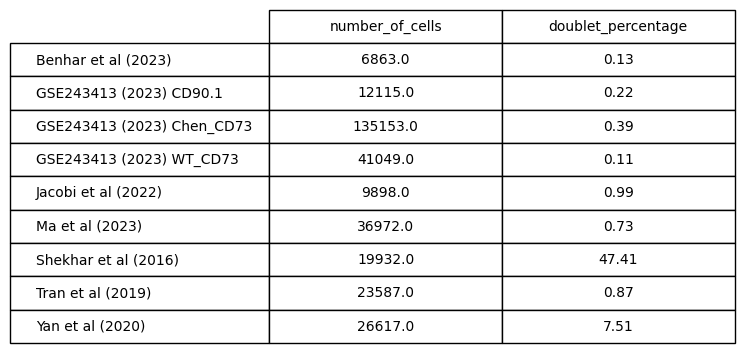

In [47]:
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust the figsize accordingly
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=doublet_percentage.values.round(2), colLabels=doublet_percentage.columns, rowLabels=doublet_percentage.index, cellLoc='center', loc='center')

# Increase vertical spacing
# table.auto_set_font_size(False)
# table.set_fontsize(10)
table.scale(1, 2)  # Adjust the scaling factors as needed

plt.savefig('figures/doublets_by_study', bbox_inches='tight')
plt.show()

In [25]:
# Create chronologically ordered barplot of doublet prevalence

In [26]:
adata_scrublet.obs.groupby('reference').apply(lambda x: (x['predicted_doublet'].sum() / len(x)) * 100)

/tmp/ipykernel_166880/1848455284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_scrublet.obs.groupby('reference').apply(lambda x: (x['predicted_doublet'].sum() / len(x)) * 100)
/tmp/ipykernel_166880/1848455284.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adata_scrublet.obs.groupby('reference').apply(lambda x: (x['predicted_doublet'].sum() / len(x)) * 100)


reference
Benhar et al (2023)           1.061236
GSE243413 (2023) Chen_CD73    0.339730
GSE243413 (2023) CD90.1       0.280482
GSE243413 (2023) WT_CD73      0.908783
Jacobi et al (2022)           0.156152
Ma et al (2023)               1.294270
Shekhar et al (2016)          0.155529
Tran et al (2019)             0.021044
Yan et al (2020)              0.638206
dtype: float64

Seems like batching by study is VERY VERY important! Seems like 4 percent are doublets 

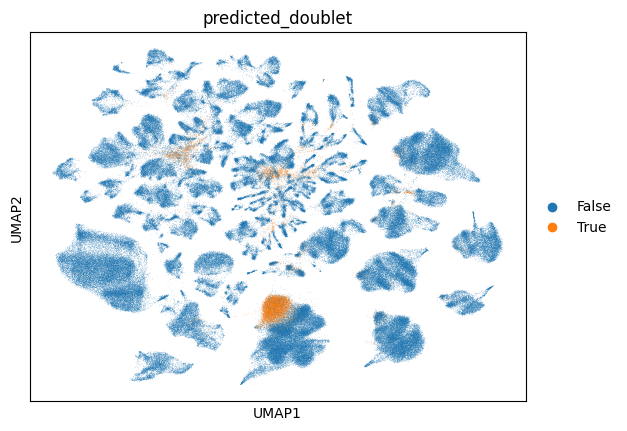

In [44]:
sc.pl.umap(
    adata,
    color=['predicted_doublet'],
    show=False
)

plt.savefig('figures/umap_doublet', bbox_inches='tight')

### Study Comparison

In [27]:
cell_type_prevalence = adata.obs.groupby('reference')['majorclass'].value_counts()
# Make a DF
cell_type_prevalence = cell_type_prevalence.unstack(fill_value=0)

# Make percentage
cell_type_prevalence = (cell_type_prevalence.div(cell_type_prevalence.sum(axis=1), axis=0) * 100).round(1)

/tmp/ipykernel_166880/3575257049.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_prevalence = adata.obs.groupby('reference')['majorclass'].value_counts()


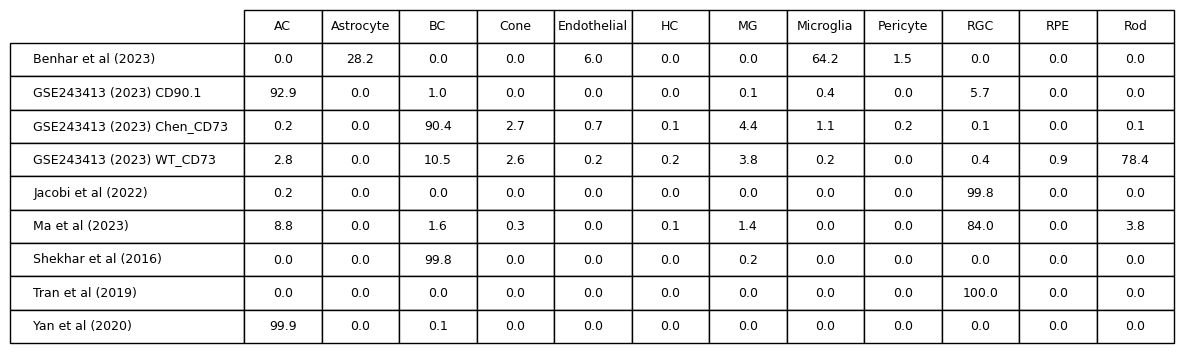

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust the figsize accordingly
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=cell_type_prevalence.values, colLabels=cell_type_prevalence.columns, rowLabels=cell_type_prevalence.index, cellLoc='center', loc='center')

# Increase vertical spacing
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1,2)

plt.savefig('figures/cell_type_by_study', bbox_inches='tight')
plt.show()

### Filtering Cells

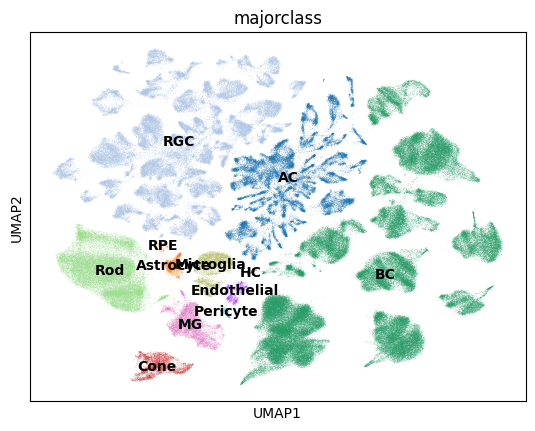

In [29]:
sc.pl.umap(
    adata,
    color=["majorclass"],
    wspace=.2,
    legend_loc="on data",
    show=False
)

plt.savefig('figures/umap_majorclass')

In [30]:
# Define filter thresholds
min_genes = 200
max_genes = 5000
min_counts = 1000
max_counts = 1e5
max_percent_mt = 5

# Create a copy of adata to apply filters
filtered_adata = adata.copy()

# Initial number of cells
initial_cells = filtered_adata.shape[0]

# Apply the first filter
before_filter1 = filtered_adata.shape[0]
filtered_adata = filtered_adata[filtered_adata.obs['n_genes_by_counts'] < max_genes, :]
after_filter1 = filtered_adata.shape[0]
removed_filter1 = before_filter1 - after_filter1

print(f"Filter 1: Cells with n_genes_by_counts < {max_genes}")
print(f"Before filter: {before_filter1} cells")
print(f"After filter: {after_filter1} cells")
print(f"Removed: {removed_filter1} cells\n")

# Apply the second filter
before_filter2 = filtered_adata.shape[0]
filtered_adata = filtered_adata[filtered_adata.obs['total_counts'] < max_counts, :]
after_filter2 = filtered_adata.shape[0]
removed_filter2 = before_filter2 - after_filter2

print(f"Filter 2: Cells with total_counts < {max_counts}")
print(f"Before filter: {before_filter2} cells")
print(f"After filter: {after_filter2} cells")
print(f"Removed: {removed_filter2} cells\n")

# Apply the third filter
before_filter3 = filtered_adata.shape[0]
filtered_adata = filtered_adata[filtered_adata.obs['pct_counts_mt'] < max_percent_mt, :]
after_filter3 = filtered_adata.shape[0]
removed_filter3 = before_filter3 - after_filter3

print(f"Filter 3: Cells with pct_counts_mt < {max_percent_mt}")
print(f"Before filter: {before_filter3} cells")
print(f"After filter: {after_filter3} cells")
print(f"Removed: {removed_filter3} cells\n")

# Total cells removed
final_cells = filtered_adata.shape[0]
total_removed = initial_cells - final_cells

print(f"Initial number of cells: {initial_cells}")
print(f"Final number of cells: {final_cells}")
print(f"Total cells removed: {total_removed}")


Filter 1: Cells with n_genes_by_counts < 5000
Before filter: 330930 cells
After filter: 312196 cells
Removed: 18734 cells

Filter 2: Cells with total_counts < 100000.0
Before filter: 312196 cells
After filter: 312196 cells
Removed: 0 cells

Filter 3: Cells with pct_counts_mt < 5
Before filter: 312196 cells
After filter: 312186 cells
Removed: 10 cells

Initial number of cells: 330930
Final number of cells: 312186
Total cells removed: 18744


Looks like there's probably around 800 doublets

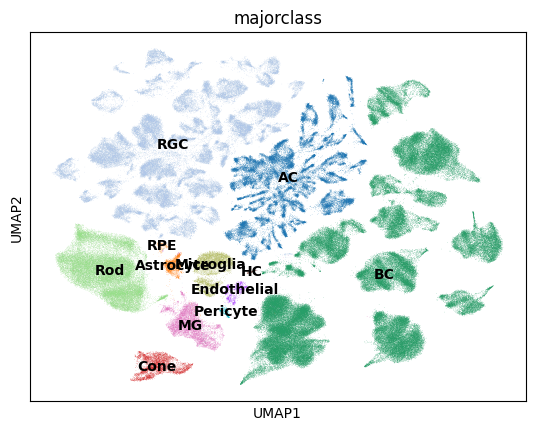

In [31]:
sc.pl.umap(
    filtered_adata,
    color=["majorclass"],
    wspace=.2,
    legend_loc="on data",
)

In [32]:
adata = filtered_adata

In [33]:
# Checking if these percentages change significantly after filtering cells
doublet_percentage = adata.obs.groupby('reference').apply(lambda x: pd.Series({
    'number_of_cells': len(x),
    'doublet_percentage': (x['predicted_doublet'].sum() / len(x)) * 100
}))

doublet_percentage

/tmp/ipykernel_166880/4237874898.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_percentage = adata.obs.groupby('reference').apply(lambda x: pd.Series({
/tmp/ipykernel_166880/4237874898.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  doublet_percentage = adata.obs.groupby('reference').apply(lambda x: pd.Series({


,number_of_cells,doublet_percentage
reference,,
Benhar et al (2023),6863.0,0.131138
GSE243413 (2023) CD90.1,12115.0,0.222864
GSE243413 (2023) Chen_CD73,135153.0,0.390668
GSE243413 (2023) WT_CD73,41049.0,0.109625
Jacobi et al (2022),9898.0,0.990099
Ma et al (2023),36972.0,0.732987
Shekhar et al (2016),19932.0,47.406181
Tran et al (2019),23587.0,0.873362
Yan et al (2020),26617.0,7.506481


### Normalization

In [34]:
# Saving count data
adata.layers["raw"] = adata.X.copy()

/tmp/ipykernel_166880/1507674632.py:2: ImplicitModificationWarning: Setting element `.layers['raw']` of view, initializing view as actual.
  adata.layers["raw"] = adata.X.copy()


In [35]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

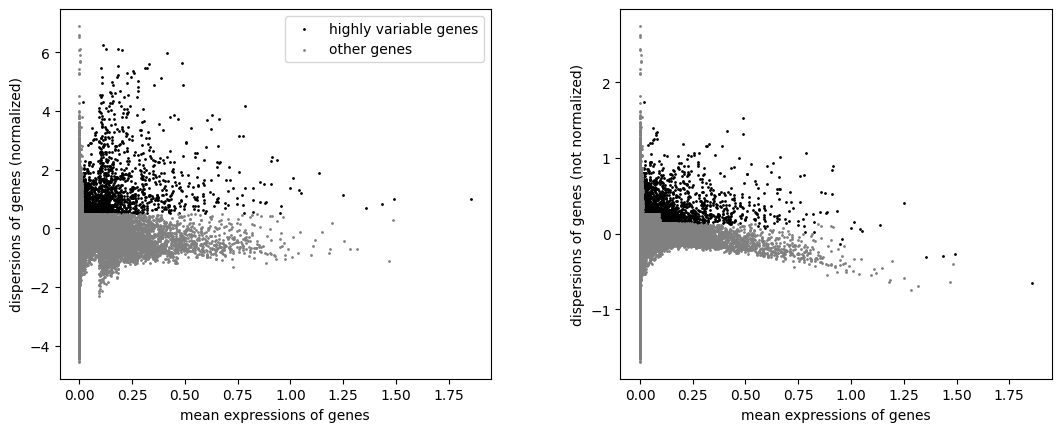

In [36]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

## Gene Expression Analysis

In [ ]:
# List of gene symbols in the desired order
gene_symbols = ['Pde6a', 'Arr3', 'Vsx2', 'Pax6', 'Rbpms', 'Onecut1', 'Slc1a3', 'Gfap', 'Cd74', 'Pecam1', 'Pdgfrb', 'Rpe65']

# Ensure that 'majorclass' in adata.obs is a categorical variable
# and order the categories as desired
cell_type_order = ['Rod', 'Cone', 'BC', 'AC', 'RGC', 'HC', 'MG', 'Astrocyte', 'Microglia', 'Endothelial', 'Pericyte', 'RPE']
adata.obs['majorclass'] = pd.Categorical(adata.obs['majorclass'], categories=cell_type_order, ordered=True)

# Create a dictionary mapping gene symbols to var_names
gene_symbol_to_var_name = {gene_symbol: var_name for gene_symbol, var_name in zip(adata.var['gene_symbols'], adata.var.index) if gene_symbol in gene_symbols}

# Ensure the gene symbols are in the desired order and map them to var_names
ordered_var_names = [gene_symbol_to_var_name[gene] for gene in gene_symbols]

# Plot the dot plot
dotplot = sc.pl.dotplot(
    adata,
    var_names=ordered_var_names,  # List of var_names corresponding to the gene symbols in the desired order
    groupby='majorclass',  # Column in adata.obs to group by (e.g., cell types)
    var_group_labels=gene_symbols,  # Use gene symbols as labels
    standard_scale='var',  # Scale expression per gene (var) or cell type (obs)
    dot_min=0.1,  # Minimum dot size
    dot_max=1,  # Maximum dot size
    color_map='Reds',  # Color map for expression
    figsize=(10, 6),  # Size of the figure
    show=False  # Do not show plot immediately
)

# Customize the x-axis tick labels
ax = dotplot['mainplot_ax']
ax.set_xticks([x + 0.5 for x in range(len(gene_symbols))])  # Shift ticks to the right
ax.set_xticklabels(gene_symbols, rotation=90)
ax.set_title('Expression of Gene Markers by Major Class')

# Save the plot
plt.savefig('figures/dot_plot_majorclass')

# Show the plot
plt.show()

KeyError: 'Rbpms'

In [ ]:
dotplot = sc.pl.dotplot(
    adata, 
    var_names=ordered_var_names, 
    groupby="leiden_res_0.02", 
    standard_scale="var", 
    figsize=(10, 6),  # Size of the figure
    show=False)

# Customize the x-axis tick labels
ax = dotplot['mainplot_ax']
ax.set_xticks([x + 0.5 for x in range(len(gene_symbols))])  # Shift ticks to the right
ax.set_xticklabels(gene_symbols, rotation=90)
ax.set_title('Expression of Gene Markers by Leiden Cluster 0.02')

# Save the plot
plt.savefig('figures/dot_plot_Leiden_0.02.png')

# Show the plot
plt.show()

NameError: name 'ordered_var_names' is not defined

In [37]:
# Only keeping variable genes
adata = adata[:, adata.var.highly_variable]

How is dispersion measured when there's no section sample?

In [38]:
speak("notebook has finished running")

## Quality of Life Stuff

In [39]:
# # Save the entire session
# filename = 'notebook_state.pkl'
# with open(filename, 'wb') as f:
#     dill.dump_session(f)

In [40]:
# import dill

# # Load the saved session
# filename = 'notebook_state.pkl'
# with open(filename, 'rb') as f:
#     dill.load_session(f)

In [41]:
adata.write('camr_scrublet_batch_filtered.h5ad')


## To Do
- [x] Scrublet on entire data (Batch study)
    - [x] Check doublet prevalence based on study (reference)
    - [x] Check cluster prevalence
- [x] Add code to save visualization or directory
- [x] Check cell type composition based on reference (investigate why so many bipolar cells)
- [ ] Check which PC correlate with which metadata (reference, cell type)
- [ ] Harmony or SCVI for integration of different (remove the bias from study)
    - [ ] Verify that there is minimal batch effect
- [ ] Run decision tree model for classification to see if gene markers align
- [ ] Stacked barplot each study and cell type
- [ ] Manually calcuate # of number of counts
    - Investigate how it is calculated?